In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric
import torch_geometric as pyg

In [4]:
x = torch.tensor([[ 1.2716e+01,  3.3980e+00,  1.2951e+01],
        [ 1.6262e+01,  3.8190e+00,  1.4292e+01],
        [ 1.8950e+01,  3.2150e+00,  1.1649e+01],
        [ 2.2689e+01,  3.6770e+00,  1.1294e+01],
        [ 2.5989e+01,  1.7770e+00,  1.1429e+01],
        [ 2.6527e+01, -9.9500e-01,  1.3937e+01],
        [ 2.0853e+01,  2.7050e+00,  1.8254e+01],
        [ 1.6590e+01, -6.2100e+00,  1.6042e+01],
        [ 1.2026e+01, -3.7400e-01,  1.5660e+01],
        [ 1.7320e+01, -2.0580e+00,  1.3585e+01],
        [ 2.0337e+01, -4.3640e+00,  1.3519e+01],
        [ 2.2208e+01, -6.7870e+00,  1.1326e+01],
        [ 2.3602e+01, -6.8800e+00,  7.8330e+00],
        [ 2.2366e+01, -5.2420e+00,  4.6410e+00],
        [ 1.9428e+01, -7.0130e+00,  3.0210e+00],
        [ 1.7643e+01, -5.4960e+00,  2.5000e-02],
        [ 1.4835e+01, -8.0550e+00, -3.0600e-01],
        [ 1.1199e+01, -7.2390e+00, -1.0210e+00],
        [ 1.0402e+01, -8.4740e+00,  2.4980e+00],
        [ 1.2855e+01, -6.1820e+00,  4.2760e+00],
        [ 1.1819e+01, -3.2300e+00,  2.0920e+00],
        [ 8.1730e+00, -3.8680e+00,  2.9690e+00],
        [ 9.1560e+00, -4.0050e+00,  6.6390e+00],
        [ 1.1074e+01, -7.3700e-01,  6.6470e+00],
        [ 8.2530e+00,  8.1800e-01,  4.6210e+00],
        [ 1.3493e+01,  7.5840e+00,  1.0835e+01],
        [ 1.6403e+01,  8.4660e+00,  1.3106e+01],
        [ 1.9664e+01,  8.3530e+00,  1.1161e+01],
        [ 3.2915e+01,  6.2100e+00,  9.0430e+00],
        [ 2.9512e+01,  6.0310e+00,  1.0749e+01],
        [ 3.0084e+01,  8.9910e+00,  6.1490e+00],
        [ 2.7535e+01,  6.1230e+00,  6.0400e+00],
        [ 2.4563e+01,  8.4140e+00,  6.7630e+00],
        [ 2.3912e+01,  9.3020e+00,  3.1170e+00],
        [ 2.3442e+01,  5.5950e+00,  2.3480e+00],
        [ 2.0791e+01,  5.1400e+00,  5.0410e+00],
        [ 1.9009e+01,  8.3040e+00,  3.8870e+00],
        [ 1.9104e+01,  7.1540e+00,  2.6200e-01],
        [ 1.7606e+01,  3.7760e+00,  1.1880e+00],
        [ 1.4843e+01,  5.4480e+00,  3.2340e+00],
        [ 1.3984e+01,  7.7310e+00,  3.0400e-01],
        [ 1.3944e+01,  4.7060e+00, -2.0210e+00],
        [ 1.1751e+01,  2.4370e+00,  7.8000e-02],
        [ 9.3150e+00,  5.2190e+00,  1.0150e+00]])
edge_index = torch.tensor([[ 0,  1,  2,  3,  4,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42],
        [ 1,  2,  3,  4,  5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
         23, 24, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]])

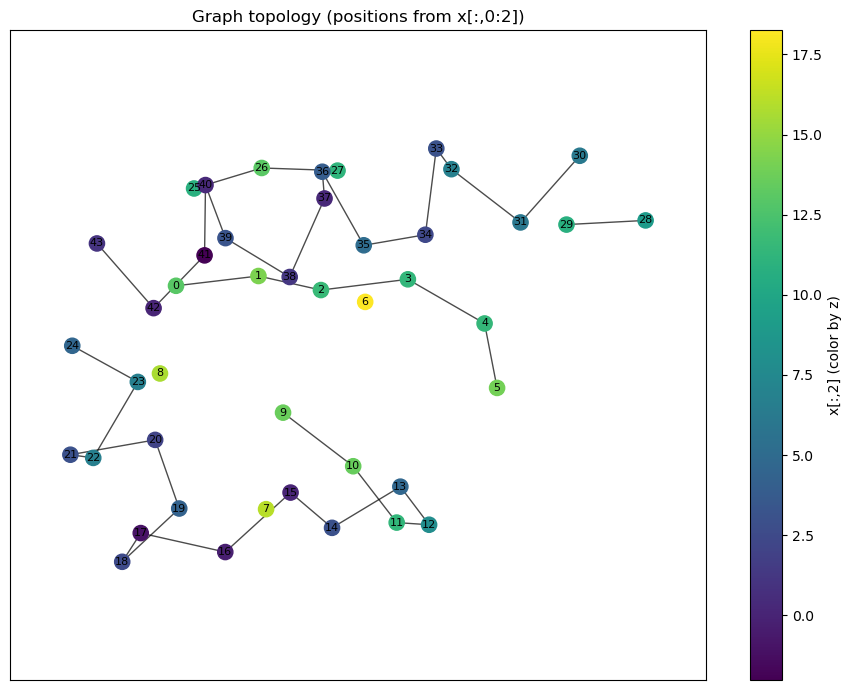

In [5]:
from torch_geometric.utils import to_networkx
import networkx as nx
import numpy as np

# create a PyG Data object and visualize the topology using the node coordinates in `x`
import matplotlib.pyplot as plt

def draw_2d_graph(x, edge_index):
    # build Data and networkx graph (undirected for topology view)
    data = pyg.data.Data(x=x, edge_index=edge_index)
    G = to_networkx(data, to_undirected=True)

    # use the first two columns of x as 2D positions
    pos = {i: (float(x[i, 0]), float(x[i, 1])) for i in range(x.size(0))}

    # color nodes by the third column of x (z)
    z_vals = x[:, 2].cpu().numpy()

    plt.figure(figsize=(9, 7))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=120, node_color=z_vals, cmap="viridis")
    nx.draw_networkx_edges(G, pos, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.colorbar(nodes, label="x[:,2] (color by z)")
    plt.title("Graph topology (positions from x[:,0:2])")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    
draw_2d_graph(x, edge_index)

In [ ]:
import nglview as nv
def visualize_3d_graph(x, edge_index):
    """
    使用nglview可视化3D分子结构
    
    参数:
    x: 节点坐标张量 [num_nodes, 3]
    edge_index: 边索引张量 [2, num_edges]
    """
    # 转换为numpy数组
    coords = x.numpy()
    
    # 创建nglview视图
    view = nv.NGLWidget()
    
    # 创建形状组件来添加几何图形
    shape = view.shape
    
    # 添加节点（原子）
    for i, coord in enumerate(coords):
        # 使用shape.add_sphere添加球体表示原子
        shape.add_sphere(list(coord), [1.0, 0.0, 0.0], 0.5)  # 红色球体
    
    # 添加边（化学键）
    edges = edge_index.numpy().T
    for edge in edges:
        start_coord = coords[edge[0]]
        end_coord = coords[edge[1]]
        # 使用shape.add_cylinder添加圆柱体表示化学键
        shape.add_cylinder(list(start_coord), list(end_coord), [0.8, 0.8, 0.8], 0.1)
    
    # 设置视角
    view.camera = 'orthographic'
    view.control.zoom(0.8)
    
    return view

# 加载蛋白质结构
view = visualize_3d_graph(x, edge_index)
pdb_file = './examples/kras/kras.pdb'
view.add_component(pdb_file)
# 设置蛋白质的显示样式为cartoon
view.add_representation('cartoon', color='grey', opacity=0.7)
# 添加stick显示配体
view.add_representation('licorice', selection='hetero and not water', color='element')
print(f"已加载蛋白质结构: {pdb_file}")

view

NGLWidget()